# Statistic Inference
- This is a R base notebook  

We saw some pattern in EDA, naturally, we would like to see if the different between feature are significantly related to the target.

## Import libaries

In [1]:
library(tidyverse)
library(broom)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘broom’ was built under R version 4.1.2”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



## Reading the data CSV
Read in the data CSV and store it as a pandas dataframe named `spotify_df`. 

In [2]:
spotify_df <- read_csv("data/spotify_data.csv")
head(spotify_df)

New names:
* `` -> ...1

Rows: 2017 Columns: 17

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): song_title, artist
dbl (15): ...1, acousticness, danceability, duration_ms, energy, instrumenta...


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



...1,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys
5,0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4,0.264,1,Sneakin’,Drake


## Regression

### Data Wrangle
- Remove `song_title` and `artist` for relationship study by regression. As both of them are neither numerical nor categorical features.

In [3]:
spotify_df_num <- spotify_df[2:15]
head(spotify_df_num)

acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1
0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1
0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1
0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1
0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1
0.00479,0.804,251333,0.560,0.000000,8,0.1640,-6.682,1,0.1850,85.023,4,0.264,1


## Set up regression model

Here, I am interested in determining factors associated with `target`. In particular, I will use a Multiple Linear Regression (MLR) Model to study the relation between `target` and all other features.

In [4]:
ML_reg <- lm( target ~ ., data = spotify_df_num) |> tidy(conf.int = TRUE)

ML_reg<- ML_reg |>
    mutate(Significant = p.value < 0.05)

ML_reg

term,estimate,std.error,statistic,p.value,conf.low,conf.high,Significant
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
(Intercept),-3.134812e-01,2.059689e-01,-1.5219831,1.281712e-01,-7.174168e-01,9.045451e-02,FALSE
acousticness,-3.253308e-01,5.499465e-02,-5.9156814,3.877171e-09,-4.331835e-01,-2.174781e-01,TRUE
danceability,4.152529e-01,7.790702e-02,5.3301087,1.092109e-07,2.624656e-01,5.680401e-01,TRUE
duration_ms,5.623683e-07,1.378752e-07,4.0788202,4.703718e-05,2.919744e-07,8.327621e-07,TRUE
energy,9.027844e-02,9.270219e-02,0.9738544,3.302464e-01,-9.152438e-02,2.720812e-01,FALSE
instrumentalness,2.676363e-01,4.426298e-02,6.0465044,1.761141e-09,1.808300e-01,3.544426e-01,TRUE
key,9.746404e-04,2.921294e-03,0.3336331,7.386913e-01,-4.754452e-03,6.703733e-03,FALSE
liveness,9.815487e-02,7.011975e-02,1.3998178,1.617228e-01,-3.936041e-02,2.356702e-01,FALSE
loudness,-2.329719e-02,4.847288e-03,-4.8062310,1.652404e-06,-3.280344e-02,-1.379093e-02,TRUE


- We can see that a lot of features are statiscally correlated with target. They are listed in the table below.

In [5]:
ML_reg |>
    filter(Significant == TRUE) |>
    select(term) 

term
<chr>
acousticness
danceability
duration_ms
instrumentalness
loudness
speechiness
valence


### GGpairs
Below is the ggpair plots to visual the correlation between different features.

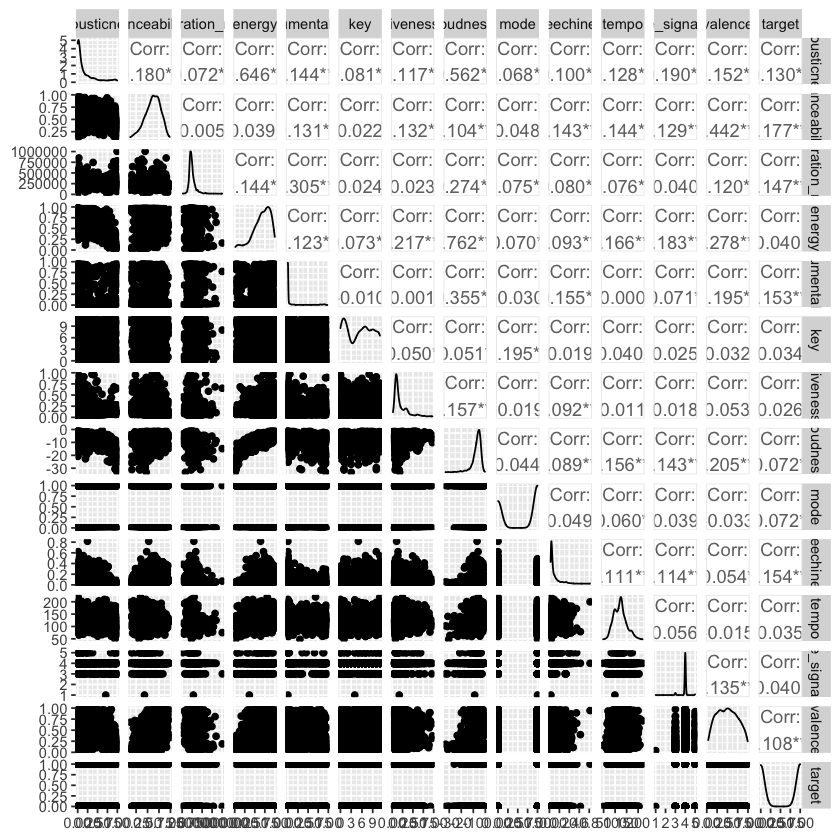

In [6]:
ggpairs(data = spotify_df_num)